In [1]:
# Check for gpu
!nvidia-smi

Thu Apr  4 22:05:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.45                 Driver Version: 536.45       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   58C    P8               1W /  55W |   6113MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

2.2.2+cu121
Device: cuda


## 1. Data preparing and loading

In [10]:
## 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("Data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Data\pizza_steak_sushi directory exists.


In [11]:
## 2. Become one with the data
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning file counts of its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'Data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'Data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'Data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'Data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'Data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'Data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'Data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'Data\pizza_steak_sushi\train\sushi'.


In [12]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('Data/pizza_steak_sushi/train'),
 WindowsPath('Data/pizza_steak_sushi/test'))

Random image path: Data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


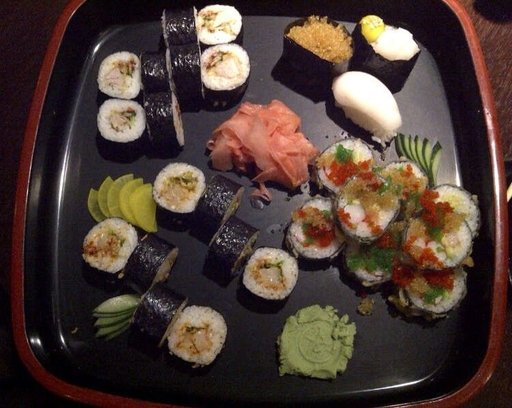

In [21]:
# Visualize an image
import random
from PIL import Image

# Set seed
random.seed(42)  # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))  # image_dir.glob("*.jpg") 将返回所有以 .jpg 结尾的文件的路径

# 2. Get random image path
random_image_path = random.choice(image_path_list)  # random.choice() 函数用于从给定的非空序列中随机选择一个元素

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem  # 表示获取 random_image_path 的父目录的文件名部分

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [19]:
# Do the image visualization with matplotlib
# import numpy as np
# import matplotlib.pyplot as plt

# # Turn the image into an array
# img_as_array = np.asarray(img)

# # Plot the image wit matplotlib
# plt.figure(figsize=(10, 7))
# plt.imshow(img_as_array)
# plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
# plt.axis(False)

In [23]:
## 3 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Write transform for turning images into tensors
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),  # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor()  # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

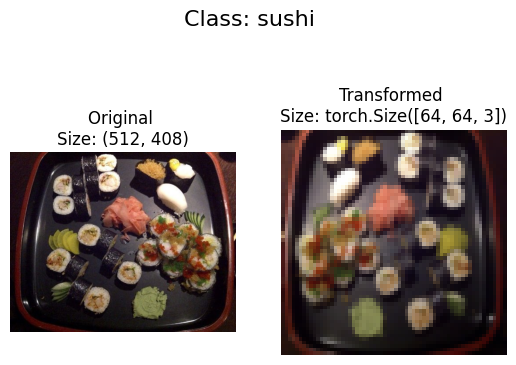

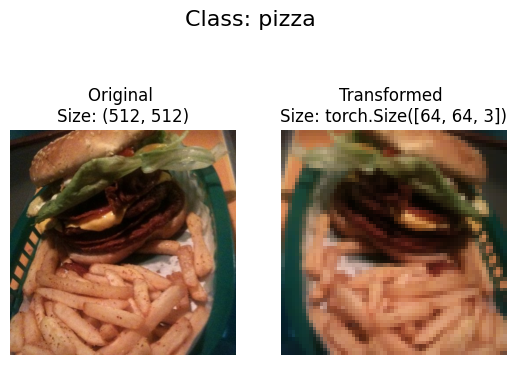

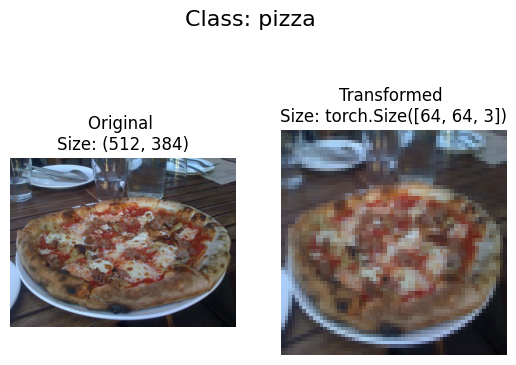

In [32]:
# Write a function to plot transformed images
import random 

# Set seed
random.seed(42)
random_image_paths = random.sample(image_path_list, k=3)

for image_path in random_image_paths:
    with Image.open(image_path) as f:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(f)
        ax[0].set_title(f"Original \nSize: {f.size}")
        ax[0].axis("off")

         # Transform and plot image
        # Note: permute() will change shape of image to suit matplotlib 
        # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
        transformed_image = data_transform(f).permute(1, 2, 0)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
        ax[1].axis("off")

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

## 1.1 Option 1: Load image data using `ImageFolder`

In [34]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,  # target folder of images
                                 transform=data_transform,  # transforms to perform on data (images)
                                 target_transform=None)  # transforms to perform on labels (if necessary)
test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: Data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: Data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [35]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [36]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [37]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [38]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

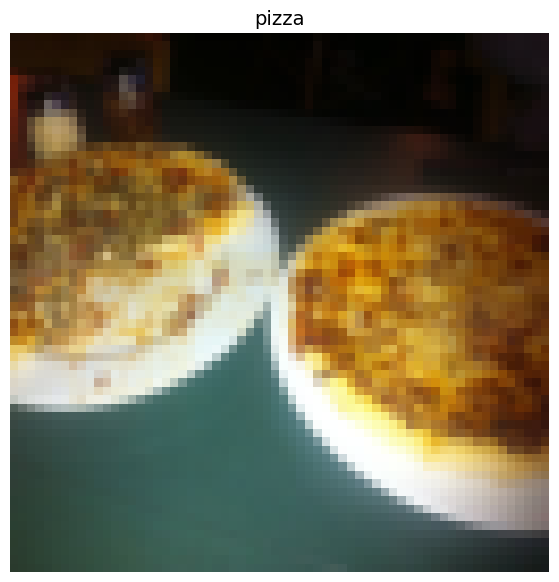

In [39]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [41]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


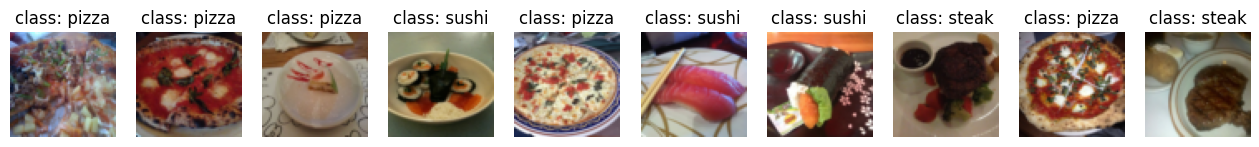

In [42]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=12, 
                      classes=class_names,
                      seed=None)

In [43]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=1,  # how many samples per batch?
                             num_workers=1,  # how many subprocesses to use for data loading? (higher = more)
                             shuffle=True)  # shuffle the data?
test_dataloader = DataLoader(dataset=test_data,
                            batch_size=1,
                            num_workers=1,
                            shuffle=False)   # don't usually need to shuffle testing data
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1a6542164a0>,
 <torch.utils.data.dataloader.DataLoader at 0x1a6542179a0>)

In [44]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [45]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

## 1.2. Option 2: Loading Image Data with a Custom `Dataset`

| Pros of creating a custom `Dataset` | Cons of creating a custom `Dataset` |
| ----- | ----- |
| Can create a `Dataset` out of almost anything. | Even though you *could* create a `Dataset` out of almost anything, it doesn't mean it will work. | 
| Not limited to PyTorch pre-built `Dataset` functions. | Using a custom `Dataset` often results in writing more code, which could be prone to errors or performance issues. |

In [46]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [47]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [50]:
data_path = Path("Data/")
image_path = data_path / "pizza_steak_sushi"

# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: Data\pizza_steak_sushi\train
Class names found: ['pizza', 'steak', 'sushi']


In [51]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class name by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [52]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [53]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1a654237010>,
 <__main__.ImageFolderCustom at 0x1a654236470>)

In [54]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [55]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [56]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [57]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [58]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


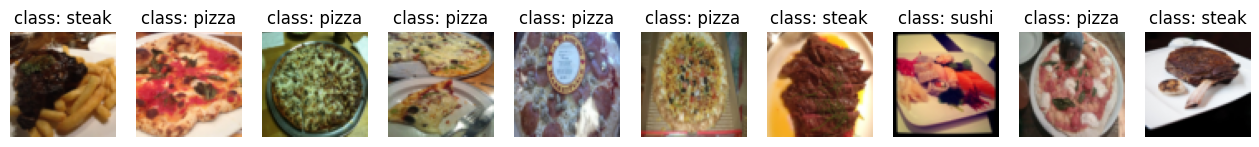

In [59]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

In [60]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x1a654c53f10>,
 <torch.utils.data.dataloader.DataLoader at 0x1a654c53f40>)

In [62]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 2. Build the model

In [114]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,  # how big is the square that's going over the image?
                     stride=1,  # default
                     padding=1),  # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
        

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Layer 1 shape: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Layer 2 shape: {x.shape}")
        x = self.classifier(x)
        # print(f"Layer 3 shape: {x.shape}")
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [115]:
len(class_names)

3

In [116]:
# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[0.0712, 0.0686, 0.0429]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 3. Training

In [117]:
# train_dataloader_custom, test_dataloader_custom
for batch, (X, y) in enumerate(train_dataloader_custom):
    print(batch, X.shape, y.shape)
    break

0 torch.Size([1, 3, 64, 64]) torch.Size([1])


In [188]:
# Create loss function
loss_fn = nn.CrossEntropyLoss()

# Create optimizer
optimizer = torch.optim.Adam(model.parameters(),
                            lr=0.001)

In [194]:
from torchmetrics import ConfusionMatrix
from torchmetrics import Precision
from torchmetrics import Recall
from torchmetrics import F1Score

confusion_matrix= ConfusionMatrix(task="multiclass", num_classes=3)
precision = Precision(task="multiclass", num_classes=3)
recall = Recall(task="multiclass", num_classes=3)
f1score = F1Score(task="multiclass", num_classes=3)

In [200]:
#Train the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 10

# Setup the loss and accuracy values
train_loss_list, train_acc_list = [], []
test_loss_list, test_acc_list = [], []

# Build a training loop
for epoch in range(epochs):
    test_loss, test_acc = 0, 0
    train_loss, train_acc = 0, 0
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(train_dataloader_custom):
    
        ### Trining
        model.train()  # training mode

        # Put data on the device
        X, y = X.to(device), y.to(device)
    
        # 1. Forward pass
        y_pred = model(X)  # torch.Size([1, 3]) [[ 0.1836, -1.1416, -0.2642]]
        
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
    
        # 3. Zero grad optimizer
        optimizer.zero_grad()
    
        # 4. Loss backward
        loss.backward()
        
        # 5. Step the optimizer
        optimizer.step()

        # Calculate and accumualte accuracy metric across all batches
        # y_pred_class = torch.softmax(y_pred, dim=1)  # torch.Size([1, 3]) [[0.5250, 0.1395, 0.3355]]
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)  # torch.Size([1]) [0]
        train_acc += (y_pred_class == y).sum().item() / len(y_pred_class)
        # confusion_matrix.update(y_pred_class.cpu(), y.cpu())
        # precision.update(y_pred_class.cpu(), y.cpu())
        # recall.update(y_pred_class.cpu(), y.cpu())
        # f1score.update(y_pred_class.cpu(), y.cpu())
        
        
    # Adjust metrics to get average loss and average accuracy per batch
    train_loss = train_loss / len(train_dataloader_custom)
    train_acc = train_acc / len(train_dataloader_custom)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)

    ### Testing
    model.eval()
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader_custom):
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred = model(X)  # torch.Size([1, 3])
            
            # 2. Calculate loss
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
    
            # Calculate and accumulate accuracy
            test_pred_class = torch.argmax(torch.softmax(test_pred, dim=1), dim=1)
            test_acc += (test_pred_class == y).sum().item() / len(test_pred_class)
            confusion_matrix.update(test_pred_class.cpu(), y.cpu())
            precision.update(test_pred_class.cpu(), y.cpu())
            recall.update(test_pred_class.cpu(), y.cpu())
            f1score.update(test_pred_class.cpu(), y.cpu())
            
    # Adjust metrics to get average loss and average accuracy per batch
    test_loss = test_loss / len(test_dataloader_custom)
    test_acc = test_acc / len(test_dataloader_custom)

    test_loss_list.append(test_loss)
    test_acc_list.append(test_acc)

    # print(f"Test loss: {test_loss} | Test Accuracy: {test_acc}")

    print(f"Epoch: {epoch} | Train loss: {train_loss} | Train Accuracy: {train_acc} | Test loss: {test_loss} | Test Accuracy: {test_acc}")

Epoch: 0 | Train loss: 0.000176595814909351 | Train Accuracy: 1.0 | Test loss: 9.12101685883575 | Test Accuracy: 0.4666666666666667
Epoch: 1 | Train loss: 0.00015157658622980661 | Train Accuracy: 1.0 | Test loss: 9.142330761305338 | Test Accuracy: 0.4666666666666667
Epoch: 2 | Train loss: 8.804080946090506e-05 | Train Accuracy: 1.0 | Test loss: 9.157469061033222 | Test Accuracy: 0.4666666666666667
Epoch: 3 | Train loss: 9.114122299125585e-05 | Train Accuracy: 1.0 | Test loss: 9.177891035041691 | Test Accuracy: 0.4666666666666667
Epoch: 4 | Train loss: 8.431195108834622e-05 | Train Accuracy: 1.0 | Test loss: 9.194228502321172 | Test Accuracy: 0.4666666666666667
Epoch: 5 | Train loss: 8.155521242451238e-05 | Train Accuracy: 1.0 | Test loss: 9.210718398380441 | Test Accuracy: 0.4666666666666667
Epoch: 6 | Train loss: 8.844313894911692e-05 | Train Accuracy: 1.0 | Test loss: 9.242079961051772 | Test Accuracy: 0.4666666666666667
Epoch: 7 | Train loss: 6.758734708900722e-05 | Train Accuracy: 

In [201]:
precision_result = precision.compute()
recall_result = recall.compute()
f1score_result = f1score.compute()

print(precision_result, recall_result, f1score_result)

tensor(0.4737) tensor(0.4737) tensor(0.4737)


In [202]:
matrix = confusion_matrix.compute()
print(matrix)

tensor([[110,  60,  80],
        [ 40,  90,  60],
        [130,  30, 160]])


In [203]:
TP = matrix.diag()  # 对角线上的值即为 TP
FP = matrix.sum(dim=1) - TP  # 列的总和减去对角线上的值即为 FP
FN = matrix.sum(dim=0) - TP  # 行的总和减去对角线上的值即为 FN

# 计算 Precision、Recall 和 F1-score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Precision: tensor([0.4400, 0.4737, 0.5000])
Recall: tensor([0.3929, 0.5000, 0.5333])
F1-score: tensor([0.4151, 0.4865, 0.5161])


In [204]:
"""
第一行：表示真实类别为第一类（Class 0）的样本。该行中的三个数字分别为：

第一个数字（1751）：表示真实类别为第一类的样本被模型正确地预测为第一类的数量（True Positive，即TP）。
第二个数字（94）：表示真实类别为第一类的样本被模型错误地预测为第二类的数量（False Negative，即FN）。
第三个数字（215）：表示真实类别为第一类的样本被模型错误地预测为第三类的数量（False Negative，即FN）。
第二行：表示真实类别为第二类（Class 1）的样本。该行中的三个数字分别为：

第一个数字（76）：表示真实类别为第二类的样本被模型错误地预测为第一类的数量（False Positive，即FP）。
第二个数字（1682）：表示真实类别为第二类的样本被模型正确地预测为第二类的数量（True Positive，即TP）。
第三个数字（122）：表示真实类别为第二类的样本被模型错误地预测为第三类的数量（False Negative，即FN）。
第三行：表示真实类别为第三类（Class 2）的样本。该行中的三个数字分别为：

第一个数字（226）：表示真实类别为第三类的样本被模型错误地预测为第一类的数量（False Positive，即FP）。
第二个数字（81）：表示真实类别为第三类的样本被模型错误地预测为第二类的数量（False Positive，即FP）。
第三个数字（1753）：表示真实类别为第三类的样本被模型正确地预测为第三类的数量（True Positive，即TP）。
"""

'\n第一行：表示真实类别为第一类（Class 0）的样本。该行中的三个数字分别为：\n\n第一个数字（1751）：表示真实类别为第一类的样本被模型正确地预测为第一类的数量（True Positive，即TP）。\n第二个数字（94）：表示真实类别为第一类的样本被模型错误地预测为第二类的数量（False Negative，即FN）。\n第三个数字（215）：表示真实类别为第一类的样本被模型错误地预测为第三类的数量（False Negative，即FN）。\n第二行：表示真实类别为第二类（Class 1）的样本。该行中的三个数字分别为：\n\n第一个数字（76）：表示真实类别为第二类的样本被模型错误地预测为第一类的数量（False Positive，即FP）。\n第二个数字（1682）：表示真实类别为第二类的样本被模型正确地预测为第二类的数量（True Positive，即TP）。\n第三个数字（122）：表示真实类别为第二类的样本被模型错误地预测为第三类的数量（False Negative，即FN）。\n第三行：表示真实类别为第三类（Class 2）的样本。该行中的三个数字分别为：\n\n第一个数字（226）：表示真实类别为第三类的样本被模型错误地预测为第一类的数量（False Positive，即FP）。\n第二个数字（81）：表示真实类别为第三类的样本被模型错误地预测为第二类的数量（False Positive，即FP）。\n第三个数字（1753）：表示真实类别为第三类的样本被模型正确地预测为第三类的数量（True Positive，即TP）。\n'

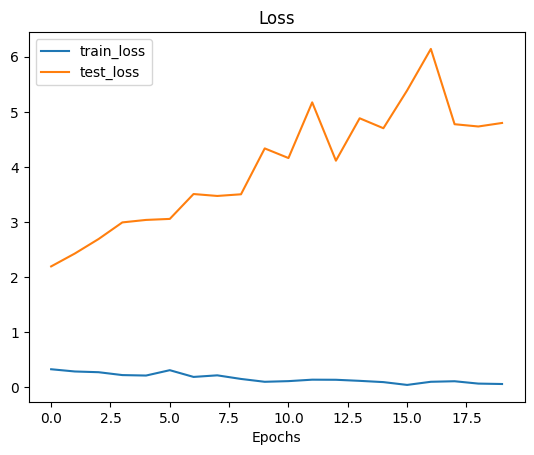

In [124]:
# Plot loss
plt.plot(train_loss_list, label='train_loss')
plt.plot(test_loss_list, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

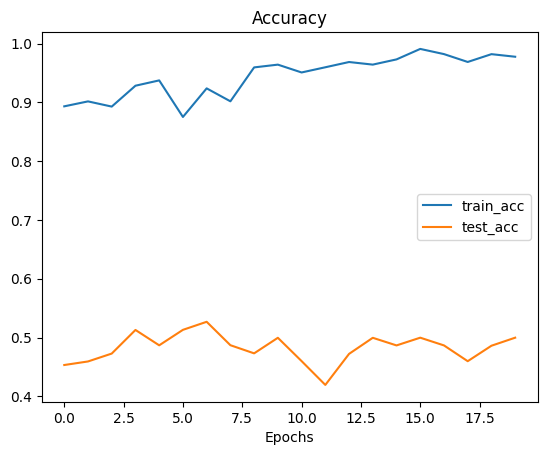

In [125]:
# Plot accuracy
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

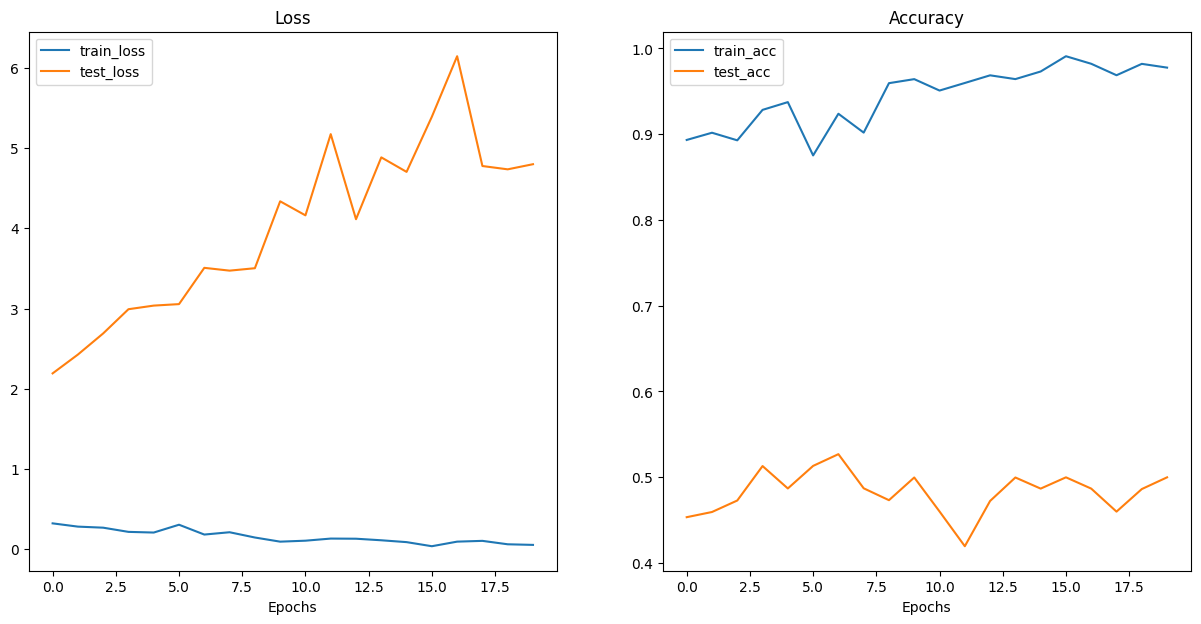

In [127]:
# Setup a plot 
plt.figure(figsize=(15, 7))


# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='train_loss')
plt.plot(test_loss_list, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()

## 4. Predicting

In [128]:
# Make a prediction on your own custom image

In [137]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [145]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img  # torch.Size([3, 4032, 3024])

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

(-0.5, 3023.5, 4031.5, -0.5)

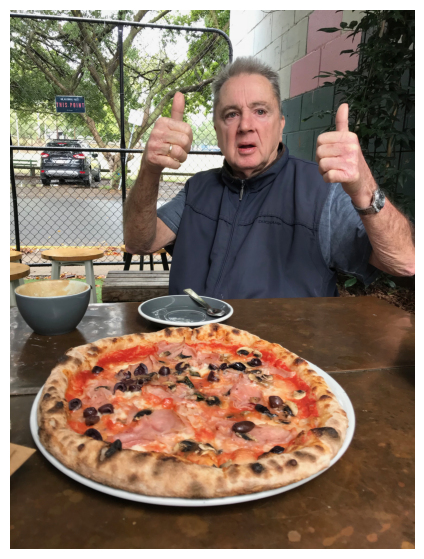

In [139]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False)

(-0.5, 63.5, 63.5, -0.5)

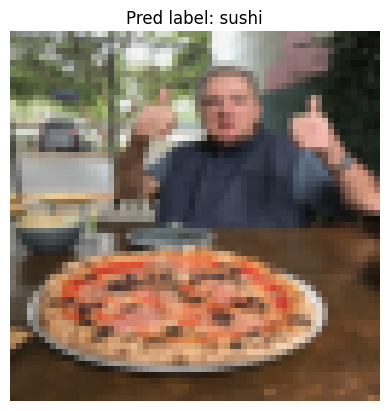

In [146]:
# Make a prediction on the image
model.eval()
with torch.inference_mode():
    # Get image pixels into float + between 0 and 1
    img = img / 255.
    
    # Resize image to 64x64
    resize = transforms.Resize((64, 64))
    img = resize(img)  # torch.Size([3, 64, 64])

    # Turn image in single batch and pass to target device
    batch = img.unsqueeze(0).to(device)  # torch.Size([1, 3, 64, 64])
    
    # Predict on image
    y_pred_logit = model(batch) 
    
    # Convert pred logit to pred label
    # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
    pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)